Goal: Create a daily NAO index using the CPC methodology 
=====

Author: [Ray Bell](https://github.com/raybellwaves)

In [1]:
# Load python packages
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
hv.notebook_extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Use the time period of the [SubX](http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/) hindcast: 1999-2016.
For a saninty check make sure that 1999-2016 is indeed the hindcast period:

In [2]:
remote_data = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.Models'\
                              '/.SubX/.RSMAS/.CCSM4/.hindcast/.zg/dods')
print(remote_data.coords['S'])

<xarray.DataArray 'S' (S: 6569)>
array(['1999-01-07T00:00:00.000000000', '1999-01-08T00:00:00.000000000',
       '1999-01-09T00:00:00.000000000', ..., '2016-12-29T00:00:00.000000000',
       '2016-12-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-01-07 1999-01-08 1999-01-09 1999-01-10 ...
Attributes:
    pointwidth:     0.0
    long_name:      Start Time
    standard_name:  forecast_reference_time
    gridtype:       0


The data used here is geopotential height at 500 hPa ($Z_{500}$) from ERA-Interim. This data was simply copied from the University of Reading archive. You can however use the [API](https://software.ecmwf.int/wiki/display/CKB/How+to+download+data+via+the+ECMWF+WebAPI) to download the data from ECMWF.

Two files exists in this directory `ERAI_z500_monthly_1999-2016.nc` (43 Mb) and `b.nc`. `ERAI_z500_monthly_1999-2016.nc` is the monthly mean of $Z_{500}$ January 1996 - December 2016. `b.nc` is daily $Z_{500}$ January 1st 1996 - December 31st 2016. The data has been interpolated to 1° to match the SubX data (360x181) and cut to 20°N-90°N for the analysis. The reference scripts for the data processing beforehand are in the directory `pre_proc`. DO THIS!

CPC's methodology for the daily NAO index can be found [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml), with some more information [here](http://www.cpc.ncep.noaa.gov/data/teledoc/telepatcalc.shtml). The procedure is based on [Barston and Livezey (1987)](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0493%281987%29115%3C1083%3ACSAPOL%3E2.0.CO%3B2).

My understanding of the methodology is as follows:

1. Use the region of 20°N-90°N with standardized $Z_{500}$ anomalies.

2. Calculate the 10 leading EOFs for each calendar month centred on that month with a window of 3 months. e.g. February is based on January-February-March (JFM). Decisions have to be made for January and December: whether to just use the two-month window or leave out the season. (It shouldn't really matter).

3. Rotate the EOFs using the varimax methodology.

4. Linearly interpolate the monthly spatial pattern to the day in question. e.g. February 1$^{st}$ will be linearly interpolated from the DJF pattern (think of the pattern defined mid-way through the mid-month: e.g. January 15$^{th}$) and the JFM pattern (February 15$^{th}$).

5. Least squared regression approach for daily data? (e.g. last paragraph in the NAO/PNA section [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/history/method.shtml) (I don't understand this)

Try creating a daily index for one day e.g. February 15$^{th}$ 2009

First we need to obtain the NAO pattern from the monthly data.

Calcualte the 10 leading EOFs for all JFMs

Use xarray's [rolling mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.rolling.html) to do the seasonal averages. Then slice it to get all the JFM's.

In [3]:
da = xr.open_dataarray('ERAI_z500_monthly_1999-2016.nc')
print(da)

sm = da.rolling(time=3).mean().dropna('time')
# Make note that time is now given as the last month in the window e.g. JFM has time 03-16T09 (MM-DDTHH)

# Use numpy's slice index to get all the JFM's
jfm = sm[0::12,:,:]
# Check that all the JFM 1999-2016 were correctly sliced 
print(jfm.coords['time'])

<xarray.DataArray 'gph500hPa' (time: 216, lat: 71, lon: 360)>
[5520960 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 1999-01-16T09:00:00 1999-02-14T21:00:00 ...
  * lat      (lat) float64 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 ...
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential Height
    units:          meters
    name:           Z
    source:         GRIB data
    time:           00:00
    title:          Geopotential
<xarray.DataArray 'time' (time: 18)>
array(['1999-03-16T09:00:00.000000000', '2000-03-16T09:00:00.000000000',
       '2001-03-16T09:00:00.000000000', '2002-03-16T09:00:00.000000000',
       '2003-03-16T09:00:00.000000000', '2004-03-16T09:00:00.000000000',
       '2005-03-16T09:00:00.000000000', '2006-03-16T09:00:00.000000000',
       '2007-03-16T09:00:00.000000000', '2008-03-16T09:00:00.000000000',
       '2009-03-

Calculate standardized anomalies

In [4]:
jfm_sa = (jfm - jfm.mean(dim=('time'))) / (jfm - jfm.mean(dim=('time'))).std(dim=('time'))
print(jfm_sa)

<xarray.DataArray (time: 18, lat: 71, lon: 360)>
array([[[-1.434221, -1.399658, ..., -1.488877, -1.463079],
        [-1.575146, -1.546949, ..., -1.617144, -1.596318],
        ...,
        [ 0.388063,  0.389183, ...,  0.385737,  0.386912],
        [ 0.333918,  0.333918, ...,  0.333918,  0.333918]],

       [[-0.976046, -1.029718, ..., -0.887624, -0.927455],
        [-0.895222, -0.951696, ..., -0.808763, -0.848008],
        ...,
        [-0.084258, -0.08346 , ..., -0.085797, -0.08504 ],
        [-0.05341 , -0.05341 , ..., -0.05341 , -0.05341 ]],

       ...,

       [[-0.174698, -0.182278, ..., -0.169951, -0.169541],
        [-0.222018, -0.233198, ..., -0.216672, -0.215745],
        ...,
        [-1.31553 , -1.316041, ..., -1.314459, -1.315002],
        [-1.290563, -1.290563, ..., -1.290563, -1.290563]],

       [[ 1.738677,  1.775604, ...,  1.66202 ,  1.702176],
        [ 1.598069,  1.633223, ...,  1.537579,  1.567922],
        ...,
        [ 1.464007,  1.461969, ...,  1.46816 ,  1.4660

Before doing the EOF apply a weighting as cosine of the latitude

In [5]:
data = jfm_sa.values
wgts = np.sqrt(np.cos(np.deg2rad(jfm_sa.coords['lat'].values)).clip(0., 1.))[..., np.newaxis]
weights = np.broadcast_arrays(data[0:1], wgts)[1][0]
data = data * weights

Calculate the 10 leading EOF modes. For a basic understanding of EOFs I recommending reading Hannachi's EOF primer [here](http://www.met.rdg.ac.uk/~han/Monitor/eofprimer.pdf) and his paper [here](https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/joc.1499). There is also a [note](http://www.met.rdg.ac.uk/~sws97mha/Eofs/eof.pdf) written by Ambaum. This code is also adapted from Dawson's [eof package](https://github.com/ajdawson/eofs)

In [6]:
# Reshape the data to be (time, space)
records = len(jfm_sa.coords['time'])
originalshape = data.shape[1:]
channels = np.prod(originalshape)
data_flat = data.reshape([records, channels])
print(np.shape(data_flat))

(18, 25560)


In [7]:
# Compute the singular value decomposition
# Principal component, eigenvalue, eof
A, Lh, E = np.linalg.svd(data_flat, full_matrices=False)

In [8]:
# Construct the eigenvalues and normalize by N-1
L = (Lh * Lh) / (float(records - 1))

# Remove the scaling on the principal component time-series that is
# implicitily introduced by using SVD instead of eigen-decomposition.
# The PCs may be re-scaled later if required.
P = A * Lh 

Return the 10 dominant EOFs

In [19]:
# Calculate the Principal Components
npcs = 10
pcs = P[:, 0:npcs] / np.sqrt(L[0:npcs])
# Put it in a DataArray
pcs_da = xr.DataArray(pcs, coords=[jfm_sa.coords['time'], range(pcs.shape[1])],
                      dims=['time', 'mode'], name='pcs')
print(pcs_da)

# Calculate the eofs
flat_eofs = E[0:npcs, :].copy()
eofs = flat_eofs / np.sqrt(L[0:npcs])[:, np.newaxis]
print(np.shape(eofs))

<xarray.DataArray 'pcs' (time: 18, mode: 10)>
array([[-6.151959e-01,  1.147294e+00, -5.250022e-01, -1.896321e+00,
         2.532846e-02, -2.438858e-01,  1.387640e+00, -9.066526e-01,
         3.875247e-01, -2.874359e-01],
       [ 7.362934e-01,  1.564674e+00, -1.083903e+00,  7.890554e-01,
        -8.957162e-02,  7.983542e-01,  4.716413e-01, -1.707907e+00,
         6.178805e-01, -4.393084e-01],
       [-6.385871e-01,  3.468233e-01, -8.878826e-04,  9.573112e-01,
         1.390250e+00,  4.245997e-01, -6.833864e-01,  6.100967e-02,
         1.708617e+00,  3.088802e-01],
       [ 6.509269e-01, -6.865323e-01, -5.009680e-01, -6.362048e-01,
         1.074133e+00,  1.996454e+00, -1.568155e-01, -6.789900e-01,
        -7.080080e-01, -1.678849e-02],
       [ 8.432200e-01, -8.495480e-01,  9.176243e-01,  1.522311e+00,
        -3.320708e-01,  2.167729e-01,  5.415950e-01,  1.496258e-01,
        -1.461457e+00, -1.923358e+00],
       [-1.341464e-01, -1.966205e-01, -1.087644e-01,  1.018083e+00,
        -5.

Calculate the 1$^{st}$ EOF as covariance

In [10]:
# Divide the input by the weighting
data = data / weights

out_shape = (npcs,) + originalshape
data_flat = data.reshape([records, channels])
pcs_flat = pcs.reshape([records, npcs])

# Divisor
div = np.float64(pcs_flat.shape[0] - float(records - 1))
cov = (np.dot(data_flat.T, pcs_flat).T / div).reshape(out_shape)
# Put into DataArray
cov_da = xr.DataArray(cov, coords=[range(pcs.shape[1]), jfm_sa.coords['lat'], jfm_sa.coords['lon']],
                         dims=['mode', 'lat', 'lon'], name='z500')
print(cov_da)

<xarray.DataArray 'z500' (mode: 10, lat: 71, lon: 360)>
array([[[-11.109956, -11.281669, ..., -10.677983, -10.903685],
        [-10.722605, -10.942151, ..., -10.24355 , -10.489671],
        ...,
        [-12.043508, -12.042397, ..., -12.045505, -12.044542],
        [-11.955381, -11.955381, ..., -11.955381, -11.955381]],

       [[ -8.699857,  -8.639038, ...,  -8.788645,  -8.750716],
        [ -8.691026,  -8.64199 , ...,  -8.761116,  -8.732147],
        ...,
        [ -1.082233,  -1.065579, ...,  -1.116015,  -1.099056],
        [ -1.326728,  -1.326728, ...,  -1.326728,  -1.326728]],

       ...,

       [[ -1.871614,  -2.197864, ...,  -1.2358  ,  -1.545025],
        [ -1.491332,  -1.817983, ...,  -0.898469,  -1.183149],
        ...,
        [  1.984838,   2.000051, ...,   1.954188,   1.969539],
        [  1.984771,   1.984771, ...,   1.984771,   1.984771]],

       [[ -0.218082,   0.015083, ...,  -0.658107,  -0.445275],
        [ -0.046859,   0.214688, ...,  -0.532648,  -0.304628],
    

Plot it

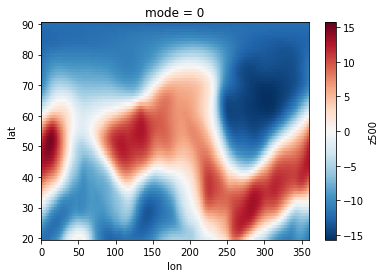

In [11]:
cov_da.isel(mode=0).plot()

Make the plot nicer using [cartopy](https://github.com/SciTools/cartopy)

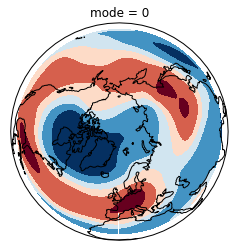

In [12]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.set_global()
cov_da.isel(mode=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
plt.show()

Show the variance explained by each mode

In [13]:
varexpl = (L[0:npcs] / L.sum()) * 100
print(varexpl)

[23.48411712 21.58471441 11.01256801  8.91611184  7.31232809  5.95202519
  4.04247043  3.45279603  3.00592007  2.41075518]


Have a look at the other modes of variability using [geoviews](https://github.com/ioam/geoviews). Just move the slider.

In [14]:
%%opts Image [projection=ccrs.Orthographic(0, 90) colorbar=False fig_size=200] (cmap='RdBu_r') Overlay [xaxis=None yaxis=None]
dataset = gv.Dataset(cov_da, kdims=['mode', 'lon', 'lat'])
dataset.to(gv.Image, ['lon', 'lat']) * gf.coastline()

:HoloMap   [mode]
   :Overlay
      .Image.I     :Image   [lon,lat]   (z500)
      .Coastline.I :Feature   [Longitude,Latitude]

There are some known patterns here and others may be spurious
- 1st Looks a bit like the [Artic Oscillation](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/loading.html)
- 2nd Looks like the [Pacific North American](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/pna_loading.html)
- 3rd. Is possibly the [NAO](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao_loading.html) but there is a lot of activity outside of the North Atlantic. Perhaps performing the REOF will reduce the noise for this variable outside of the North Atlantic?

The idea of rotating the eofs is to maximise the sum of the variances so the coefficients will either be large or near-zero. You can read about it more in [Richman 1986](https://rmets.onlinelibrary.wiley.com/doi/pdf/10.1002/joc.3370060305). The most common method is the varimax rotation. There is an answer for how to do with numpy [here](https://stackoverflow.com/questions/17628589/perform-varimax-rotation-in-python-using-numpy), *bmcmenamin* has a fa_kit where is does the rotation [here](https://github.com/bmcmenamin/fa_kit/blob/master/fa_kit/rotation.py) based on a script by *rossfadely* [here](https://github.com/rossfadely/consomme/blob/master/consomme/rotate_factor.py). Dawson also has the rotation as WIP [here](https://github.com/ajdawson/eofs/blob/experimental-rotation/lib/eofs/experimental/rotation/kernels.py). I hope to build on that package.

In [31]:
eps = 1e-10 # Tolerance value used to determine convergence of the rotation algorithm
itermax = 1000 # Maximum number of iterations 

# Apply kaiser row normalization
scale = np.sqrt((eofs ** 2).sum(axis=0))
eofs_norm = eofs / scale

rotation = np.eye(npcs, dtype=eofs_norm.dtype) # Initialize
delta = 0.
for i in range(itermax):
    z = np.dot(eofs_norm.T, rotation)
    b = np.dot(eofs_norm,
               z ** 3 - np.dot(z, np.diag((z ** 2).sum(axis=0)) / channels))
    u, s, v = np.linalg.svd(b)
    rotation = np.dot(u, v)
    delta_previous = delta
    delta = s.sum()
    if delta < delta_previous * (1. + eps):
        break
reofs = np.dot(eofs_norm.T, rotation).T
reofs = reofs * scale
print(np.shape(reofs))

(10, 25560)


In [29]:
# Need to work out how to obtain the new rpcs. Stuck.

#reofs2d = reofs.reshape((npcs,) + originalshape)
#print(np.shape(reofs2d))
#print(np.max(reofs2d))
#print(np.min(reofs2d))



# Compute variances of the rotated EOFs
#reofs_var = (reofs ** 2).sum(axis=1)
#print(reofs_var)

# Calculate the new variance by the rotated modes
# Compute eigen values
#eof_ev = L[0:npcs]
#eof_vf = L[0:npcs] / L.sum()
#ratio = eof_vf[0] / eof_ev[0]
#vf_reofs = reofs_var * ratio
#vf_reofs = np.array([1. / float(reofs.shape[1])] * 10)
#print(vf_reofs)

#nspace = np.prod(channels)
#ev = eofs.reshape([npcs, nspace])
#print(np.shape(ev))
#field = eofs.reshape((npcs,) + originalshape)
#print(np.shape(field))
#rpcs = np.dot(ev, reofs.T)
# Should be (time(18), mode(10)) but it's (10, 10) eofs oroginally is 18 x channels (this svd computes eofs as the len of time)
# However, eofs is cut to 10 to include the 10 dominant ones beforehand so returns (10, 10)
#print(np.shape(rpcs))
#print(rpcs)

(10, 71, 360)
0.0010018973564423497
-0.0010664633624341223


In [30]:
# Use these rpcs to plot the reofs
#rpcs_flat = rpcs.reshape([records, npcs])
#print(np.shape())

Enter a start-time an end-time for which to calculate the daily NAO index
e.g. lets look at the large negativate NAO of winter 2008/2009:

In [ ]:
stime = '2009-02-01-T12:00:00'
etime = '2009-02-14-T12:00:00'

Now extend for the winter months (DJF)

In [ ]:
stime = '2008-12-01-T12:00:00'
etime = '2009-02-28-T12:00:00'

Now do for all winters